In [1]:
# Import the required libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
# Function to read JSON files
def read_json(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data


In [3]:
# Read dataset files
train_challenges = read_json('/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json')
train_solutions = read_json('/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json')
eval_challenges = read_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json')
eval_solutions = read_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json')
test_challenges = read_json('/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json')

In [4]:
# Function to display the grid
def plot_grid(grid, title=""):
    plt.figure(figsize=(5, 5))
    sns.heatmap(grid, annot=True, cbar=False, cmap='viridis', linewidths=.5)
    plt.title(title)
    plt.show()

In [5]:
# Sample data exploration
task_ids = list(train_challenges.keys())
example_task_id = task_ids[0]
example_task = train_challenges[example_task_id]

print("Example task:")
print("Task ID:", example_task_id)
print("Test:")
for pair in example_task['test']:
    print("Input:")
    for row in pair['input']:
        print(row)
    print()

print("Example Train:")
for pair in example_task['train']:
    print("Input:")
    for row in pair['input']:
        print(row)
    print("Output:")
    for row in pair['output']:
        print(row)
    print()

Contoh Task:
Task ID: 007bbfb7
Test:
Input:
[7, 0, 7]
[7, 0, 7]
[7, 7, 0]

Train:
Input:
[0, 7, 7]
[7, 7, 7]
[0, 7, 7]
Output:
[0, 0, 0, 0, 7, 7, 0, 7, 7]
[0, 0, 0, 7, 7, 7, 7, 7, 7]
[0, 0, 0, 0, 7, 7, 0, 7, 7]
[0, 7, 7, 0, 7, 7, 0, 7, 7]
[7, 7, 7, 7, 7, 7, 7, 7, 7]
[0, 7, 7, 0, 7, 7, 0, 7, 7]
[0, 0, 0, 0, 7, 7, 0, 7, 7]
[0, 0, 0, 7, 7, 7, 7, 7, 7]
[0, 0, 0, 0, 7, 7, 0, 7, 7]

Input:
[4, 0, 4]
[0, 0, 0]
[0, 4, 0]
Output:
[4, 0, 4, 0, 0, 0, 4, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 4, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 4, 0, 4, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 4, 0, 0, 0, 0]

Input:
[0, 0, 0]
[0, 0, 2]
[2, 0, 2]
Output:
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 2, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 2, 0, 0, 0, 0, 0, 2]
[2, 0, 2, 0, 0, 0, 2, 0, 2]

Input:
[6, 6, 0]
[6, 0, 

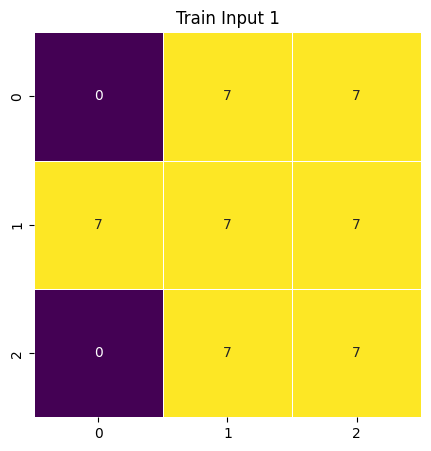

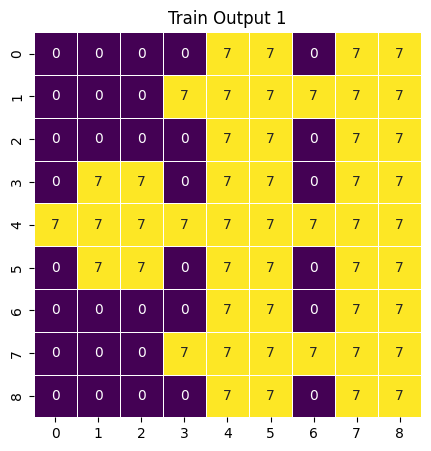

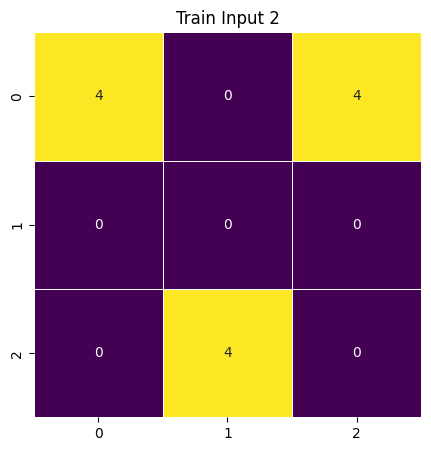

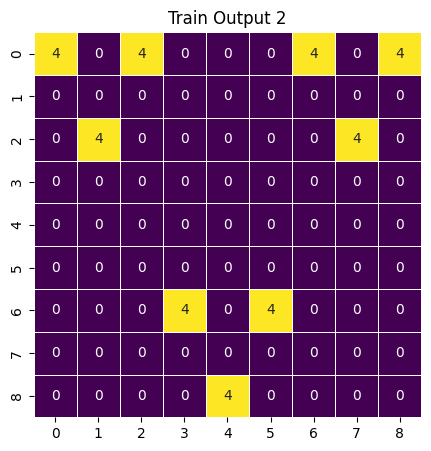

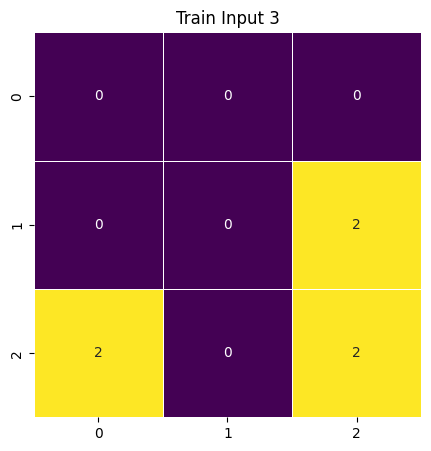

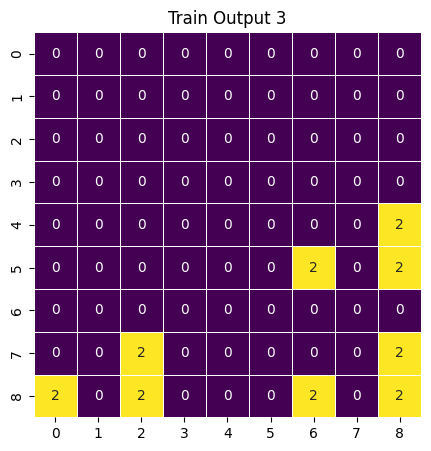

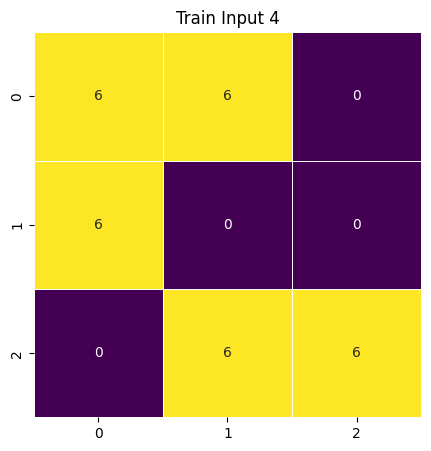

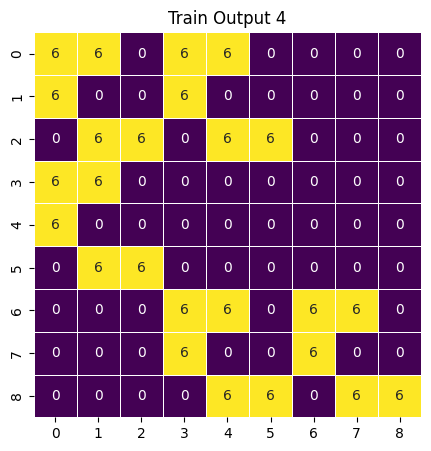

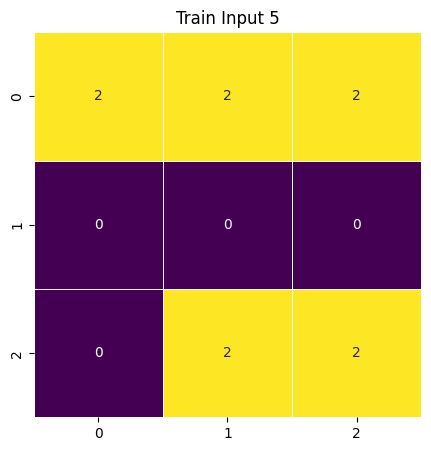

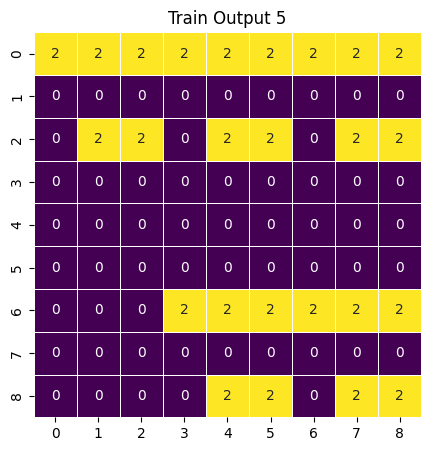

In [6]:
# Display the input and output grids of the example task
for idx, pair in enumerate(example_task['train']):
    input_grid = np.array(pair['input'])
    output_grid = np.array(pair['output'])
    plot_grid(input_grid, title=f"Train Input {idx+1}")
    plot_grid(output_grid, title=f"Train Output {idx+1}")

In [7]:
# Function to predict grid output (simple model)
def predict_output(input_grid):
    # Simple model: only returns grid input as output
    return input_grid

In [8]:
# Make predictions for the test_challenges file
predictions = defaultdict(list)

for task_id, task_data in test_challenges.items():
    for pair in task_data['test']:
        input_grid = np.array(pair['input'])
        predicted_output = predict_output(input_grid)
        predictions[task_id].append(predicted_output.tolist())

In [9]:
# Save the prediction to the submission.json file
submission = {"predictions": predictions}
with open('submission.json', 'w') as file:
    json.dump(submission, file)

print("Predictions saved to submission.json")

Predictions saved to submission.json
